# Demo2: Simple Harmonic Oscillator with RK2/RK4

In this jupyter notebook, we will learn how to use the Runge-Kutta 2/4 methods to solve for the motions of a simple harmonic oscillaotr.

&copy; Kuo-Chuan Pan, 2024\
For the course "Computational Physics" at NTHU

### Governing equations

The governing equations are 
$$
a^{t^n} = - \omega_0^2 x^{t^n},
$$

$$
\frac{dx}{dt} = v,
$$
and 
$$
\frac{dv}{dt} = a.
$$


### Runge-Jutta methods

Higher-order explicit schemes.

* RK2

$$
y_{k+1} = y_k + \frac{h_k}{2}(k_1 + k2),
$$
where $k_1 = f(t_k, y_k)$ and $k_2 = f(t_k+h_k, y_k + h_k k1)$.

* RK4

$$
y_{k+1} = y_k + \frac{h_k}{6}(k_1 +2k_2 +2k_3+k_4),
$$
where $k_1= f(t_k,y_k)$, $k_2=f(t_k+h_k/2, y_k + (h_k/2)k_1)$,
$k_3=f(t_k+h_k/2, y_k + (h_k/2)k_2)$, and $k_4=f(t_k+h_k, y_k+h_k k3)$.


### Initial Conditions

At time $t=0$, position $x=1$ and velocity $v=0$.\
Set $A=k=m=1$, and $\omega_0=\sqrt{k/m}=1$ as well.

## Exercie 1: Redo demo1 with the RK2/RK4 method
Use a small time step $\Delta t=0.01$ and solve for the solution at $t=20$.

In [1]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass

In [2]:
# data management
@dataclass
class Data:
    def __init__(self,ndim):
        self.N = ndim
        self.t  = np.empty((0))
        self.y  = np.empty((ndim,0))
        self.yp = np.empty((ndim,0))
    def append(self,t1,y1,yp1):
        self.t  = np.append(self.t,t1)
        self.y  = np.append(self.y.T,[y1],axis=0).T
        self.yp = np.append(self.yp.T,[yp1],axis=0).T
    def plot(self,object='y'):
        if object=='y':
            i=0
            plt.figure('y')
            for y in self.y:
                i+=1
                plt.plot(self.t,y,label=f'y{i}')
            plt.legend(loc='best')
            plt.xlabel(r't')
            plt.ylabel(r'y')
            plt.show()
        elif object=='yp':
            i=0
            plt.figure('yp')
            for yp in self.yp:
                i+=1
                plt.plot(self.t,yp,label=f'dydt{i}')
            plt.legend(loc='best')
            plt.xlabel(r't')
            plt.ylabel(r'yp')
            plt.show()
        else:
            print('Wrong object command.')
    def clear(self):
        self.t  = np.empty((0))
        self.y  = np.empty((self.N,0))
        self.yp = np.empty((self.N,0))

In [22]:
# general calculation functions
def euler(f,y0:list,t0=0,tmax=20,dt=0.01):
    sol = Data(len(y0))
    N = int((tmax-t0)/dt)
    t = t0
    y = y0
    yp = f(t,y0)
    sol.append(t,y,yp)
    for i in range(1,N):
        t += dt
        y += dt*yp
        yp = f(t,y)
        sol.append(t,y,yp)
    return sol
def rk2(f,y0:list,t0=0,tmax=20,dt=0.01):
    sol = Data(len(y0))
    N = int((tmax-t0)/dt)
    t = t0
    y = y0
    yp = f(t,y0)
    sol.append(t,y,yp)
    for i in range(1,N):
        t += dt
        k1 = f(t,y)
        k2 = f(t+dt,y+k1*dt)
        y += (k1+k2)*dt/2
        yp = f(t,y)
        sol.append(t,y,yp)
    return sol
def rk4(f,y0:list,t0=0,tmax=20,dt=0.01):
    sol = Data(len(y0))
    N = int((tmax-t0)/dt)
    t = t0
    y = y0
    yp = f(t,y0)
    sol.append(t,y,yp)
    for i in range(1,N):
        t += dt
        k1 = f(t,y)
        k2 = f(t+dt/2,y+k1*dt/2)
        k3 = f(t+dt/2,y+k2*dt/2)
        k4 = f(t+dt,y+k3*dt)
        y += (k1+2*k2+2*k3+k4)*dt/6
        yp = f(t,y)
        sol.append(t,y,yp)
    return sol

In [23]:
#
# This is a simple example of how to solve a simple harmonic oscillator using the RK2 method
#

# Step 1: set up the parameters of the problem
def shm(t,y,k=1,m=1):
    return np.array([y[1],-k/m*y[0]])
shm_euler = euler(shm,[1,0])
shm_rk2   = rk2(shm,[1,0])
shm_rk4   = rk4(shm,[1,0])

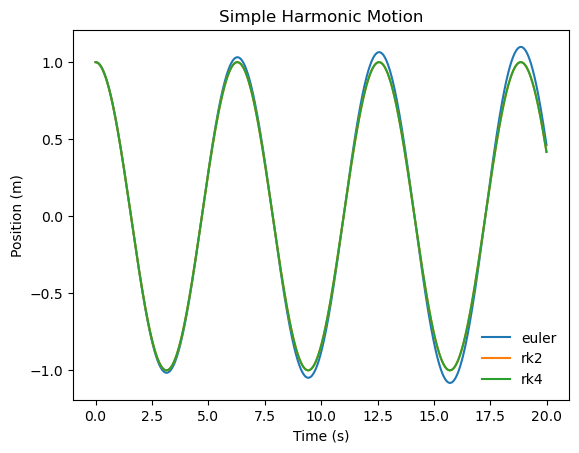

In [24]:
# Step 5: plot the solution
plt.plot(shm_euler.t,shm_euler.y[0],label='euler')
plt.plot(shm_rk2.t,shm_rk2.y[0],label='rk2')
plt.plot(shm_rk4.t,shm_rk4.y[0],label='rk4')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend(loc='best',frameon=False)
plt.title('Simple Harmonic Motion')
plt.show()

We could verify our numerical solution be comparing it with the analytical solutions.
The analytical solutions are:

$$
x = A \cos(\omega_0 t + \phi),
$$
and

$$
v = -A \omega_0 \sin(\omega_0 t + \delta).

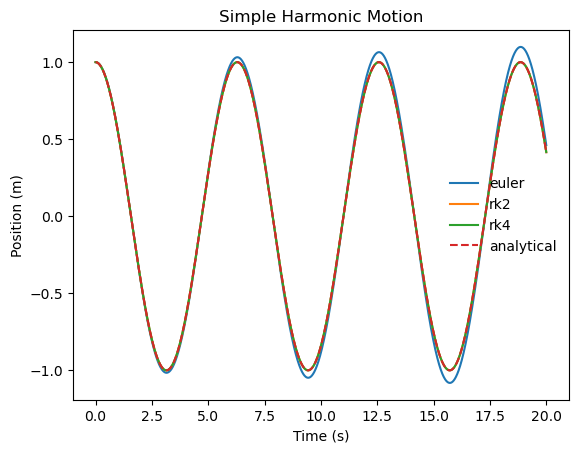

In [34]:
# analytical solution and numerical error estimation
t = np.linspace(0,20,2000,endpoint=True)
x_ana = np.cos(t)
v_ana = -np.sin(t)
plt.figure('analytical')
plt.plot(shm_euler.t,shm_euler.y[0],label='euler')
plt.plot(shm_rk2.t,shm_rk2.y[0],label='rk2')
plt.plot(shm_rk4.t,shm_rk4.y[0],label='rk4')
plt.plot(t,x_ana,'--',label='analytical')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend(loc='best',frameon=False)
plt.title('Simple Harmonic Motion')
plt.show()

Another way to chekc the accuray of our numerical solution is to check the energy conservation and the phase-sapce diagram.

Text(0, 0.5, 'Error [m]')

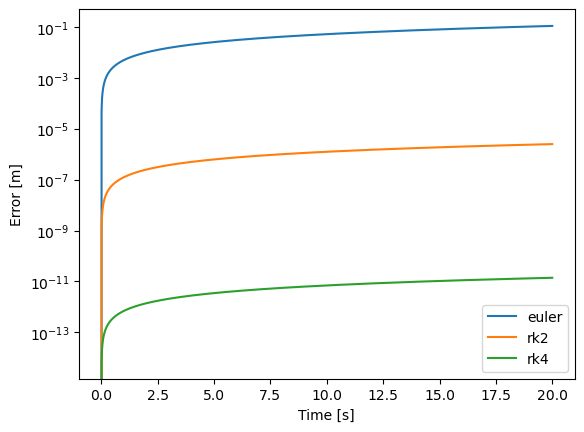

In [43]:
energy_ana = 0.5*x_ana**2+0.5*v_ana**2
energy_euler = 0.5*(shm_euler.y[0]**2+shm_euler.y[1]**2)
energy_rk2 = 0.5*(shm_rk2.y[0]**2+shm_rk2.y[1]**2)
energy_rk4 = 0.5*(shm_rk4.y[0]**2+shm_rk4.y[1]**2)
error_euler = np.abs(energy_ana-energy_euler)
error_rk2 = np.abs(energy_ana-energy_rk2)
error_rk4 = np.abs(energy_ana-energy_rk4)
plt.figure(1)
plt.plot(t,error_euler,label='euler')
plt.plot(t,error_rk2,label='rk2')
plt.plot(t,error_rk4,label='rk4')
plt.yscale('log')
plt.legend(loc='best')
plt.xlabel('Time [s]')
plt.ylabel('Error [m]')

## Exercise 2: Error Convergence


In [41]:
#
# This is a simple example of error convergence in SHM
#

def convergence(dts,method='euler'):
    errs = np.zeros(len(dts))
    for i,dt in enumerate(dts):
        if method == 'euler':
            sol = euler(shm,[1,0],dt=dt)
        elif method == 'rk2':
            sol = rk2(shm,[1,0],dt=dt)
        elif method == 'rk4':
            sol = rk4(shm,[1,0],dt=dt)
        etot = 0.5*(sol.y[0]**2+sol.y[1]**2)
        errs[i] = abs(etot[-1]-etot[0])
    print('DONE')
    return errs

In [42]:
dts = np.logspace(-4,-1,5)
errs_euler = convergence(dts,method='euler')
errs_rk2 = convergence(dts,method='rk2')
errs_rk4 = convergence(dts,method='rk4')

DONE


KeyboardInterrupt: 

In [ ]:
plt.figure('errs')
plt.plot(dts,error_euler,label='euler')
plt.plot(dts,error_rk2,label='rk2')
plt.plot(dts,error_rk4,label='rk4')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Time step [s]')
plt.ylabel('Energy error [J]')